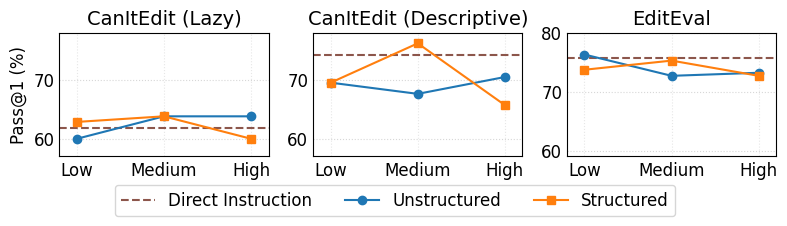

In [1]:
# Visualize three datasets as subplots in a single figure, with minimal design, large fonts, and high-contrast colors.
# Each subplot shows two lines (Unstructured/Structured) and a horizontal reference line (Direct Instruction).
# Subplots are arranged horizontally, each with its own y-limit, and the overall style is minimal and visually striking.

import matplotlib.pyplot as plt
import os

# ---- Data ----
datasets = {
    "CanItEdit (Lazy)": {
        "direct": 61.90,
        "unstructured": {"low": 60.00, "medium": 63.81, "high": 63.81},
        "structured": {"low": 62.86, "medium": 63.81, "high": 60.00},
    },
    "CanItEdit (Descriptive)": {
        "direct": 74.29,
        "unstructured": {"low": 69.52, "medium": 67.62, "high": 70.48},
        "structured": {"low": 69.52, "medium": 76.19, "high": 65.71},
    },
    "EditEval": {
        "direct": 75.77,
        "unstructured": {"low": 76.29, "medium": 72.68, "high": 73.20},
        "structured": {"low": 73.71, "medium": 75.26, "high": 72.68},
    },
}

granularities = ["low", "medium", "high"]
granularities_cap = [g.capitalize() for g in granularities]

# Output directory for figures
out_dir = "./figure/"
os.makedirs(out_dir, exist_ok=True)

# Colors aligned with expert visualization: Unstructured (blue), Structured (orange), Direct (default C3)
unstructured_color = "C0"
structured_color = "C1"
direct_color = "C5"

# Create a single figure with 3 horizontal subplots
# First two subplots (CanItEdit variants) will have same y-axis range, third (EditEval) has independent y-axis
fig, axes = plt.subplots(1, 3, figsize=(8, 2), facecolor="white")

for ax, (name, d) in zip(axes, datasets.items()):
    us = [d["unstructured"][g] for g in granularities]
    st = [d["structured"][g] for g in granularities]
    di = d["direct"]

    # Use numeric x positions to allow x-limits and vertical grids
    x_positions = [0, 1, 2]

    # Plot Direct Instruction as a thick, high-contrast dashed line (red)
    ax.axhline(
        y=di,
        linestyle="--",
        color=direct_color,
        label="Direct Instruction",
    )

    # Plot Unstructured and Structured lines with strong colors and bold lines
    ax.plot(
        x_positions,
        us,
        marker="o",
        label="Unstructured",
        color=unstructured_color,
    )
    ax.plot(
        x_positions,
        st,
        marker="s",
        label="Structured",
        color=structured_color,
    )

    # Set y-axis limits - first two subplots share limits, third has independent limits
    if ax in [axes[0], axes[1]]:  # CanItEdit variants - shared y-axis
        ax.set_ylim(57, 78)
    else:  # EditEval - independent y-axis
        ax.set_ylim(59, 80)  # Focus on the higher range for EditEval

    # Slightly expand x-limits and set tick labels
    ax.set_xlim(-0.2, 2.2)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(granularities_cap)

    # Set subplot title with large font
    ax.set_title(name, fontsize=14)
    # Set tick label size
    ax.tick_params(labelsize=12, length=0)
    # Add horizontal and vertical faint dashed grid lines
    ax.grid(axis="y", alpha=0.5, linestyle=":", linewidth=0.8)
    ax.grid(axis="x", alpha=0.3, linestyle=":", linewidth=0.8)
    # Only show y-label on the first subplot
    if ax == axes[0]:
        ax.set_ylabel("Pass@1 (%)", fontsize=12)
    else:
        ax.set_ylabel("")

# Add a single legend below all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.15),
    fontsize=12,
    ncol=3,
)

# Adjust layout for compactness and aesthetics
plt.tight_layout()

# Save the combined figure
out_path = os.path.join(out_dir, "datasets_result.pdf")
plt.savefig(out_path, bbox_inches="tight")

In [2]:

# Compute averages for NL-mediated (all variants of unstructured + structured)
results = {}
all_diffs = []

for dataset, values in datasets.items():
    direct = values["direct"]
    nl_values = list(values["unstructured"].values()) + list(values["structured"].values())
    avg_nl = sum(nl_values) / len(nl_values)
    diff = avg_nl - direct
    results[dataset] = diff
    all_diffs.append(diff)

# Compute overall average difference
overall_avg_diff = sum(all_diffs) / len(all_diffs)
results, overall_avg_diff

({'CanItEdit (Lazy)': 0.48166666666666913,
  'CanItEdit (Descriptive)': -4.450000000000017,
  'EditEval': -1.799999999999983},
 -1.922777777777777)